# Homework 3 - Computational Physics PHYS1600
* Alexander Koh-Bell
* GitHub User Name: alexkb8
* Email: alexander_koh-bell@brown.edu

## Question 1
## 1. part a)

In [113]:
# %matplotlib notebook
import numpy as np
from scipy.integrate import odeint
import rootfinder as rtf
import matplotlib.pyplot as plt
from scipy.linalg import eigh

In [114]:
class QM(object):
    def __init__(self,E, npoints, x_start, x_end = 0, u0 = 0.0, v0 = 0.01):
        self.E = E
        self.npoints = npoints
        self.uv0 = np.array([u0, v0]) # NumPy array with initial position and velocity
       
        # always want to start at furthest point and go to zero
        self.xarray = np.linspace(x_start, x_end, npoints, endpoint = True) # include final timepoint

    def scipy_trajectory(self):
        """calculate trajectory using SciPy ode integrator"""
        self.uv = odeint(self.sch, self.uv0, self.xarray)
        self.uv_end = self.uv[-1]


    def sch(self, uv, x):
    
        """right hand side of the differential equation"""
        u = uv[1]
        v = 1.0*(x**2 - self.E)*uv[0]
        return np.ravel(np.array([u, v]))

In [115]:
# the matching function
def match(En):
    a = 1.0e-11
    V0 = 50.0
    a = 10*10**(-11)
    m = 9.1*10**(-31)
    h = 6.582119*10**(-16)
        
    w = (2*V0/(a**2*m))**(1/2)
    zetaFactor = ((m*w)/h)**(1/2)
    aZeta = zetaFactor*a

    
    p_up = QM(E = En, npoints = 1000, x_start = -10)
    p_down = QM(E = En, npoints = 1000, x_start = 10)
    p_up.scipy_trajectory()
    p_down.scipy_trajectory()

    return p_down.uv_end[0]*p_up.uv_end[1] - p_down.uv_end[1]*p_up.uv_end[0]

In [122]:
a = 1.0e-3
E1 =  0 # start Energy search at the well depth
dE = .1
npoints = 1000


E_SM = []

# fig = plt.figure()
# ax = fig.add_subplot(111)

# Bound states must have E < 0 for the square well. 
# Cut off after we have found a few states
while (E1 < 25-dE):

    if match(E1)*match(E1 + dE) < 0 :  # bracket E
        # find the energy
        E = rtf.bisect(match, E1, E1+dE, 1e-12)
        print('Energy found: %.5f'%(E))
        E_SM.append(E)
        if (len(E_SM)>9):
            break
        dx = 16*a/npoints
        
        # for plotting, must ensure overlap of left and right solutions 
        p_up = QM(E, npoints = npoints+4, x_start = -10, x_end = 0+4*dx)
        p_down = QM(E, npoints = npoints-4, x_start = 10, x_end = 0+4*dx)
        
        p_up.scipy_trajectory()
        p_down.scipy_trajectory()
        
        # scale factor
        scale = p_up.uv_end[0]/p_down.uv_end[0]
        
        # full solution, combine up and down solutions
        psi_x = np.concatenate((p_up.uv[:-1,0], scale*p_down.uv[::-1,0]))
        xa = np.linspace(-10,10, 2*npoints-1, endpoint = True)
        
        # plot the scaled solution (not normalized), scale maximum to 1 for plotting purposes
#         ax.plot(xa, psi_x/max(psi_x))
    else : 
#         print("No bracket, increasing energy to", E1+dE)
        pass
    E1 += dE

a = 1.0e-11
V0 = 50.0
m = 9.1*10**(-31)
h = 6.582119*10**(-16)
w = (2*V0/(a**2*m))**(1/2)

print("Above energies in terms of 'K', defined as 2*E/(h*omega)")
print("omega is defined as: sqrt(2*V0/(a^2*m)), this comes from the Grifiths Analytic Method")
print(" ")

constant = (h*w/2)*(a*50) #approximate scaling 
Econverted = [x * (constant) for x in E_SM]
print("List of approximate Energies in eV: ")
print(Econverted)


EsHarmonic = E_SM  #storing solutions for part b


Energy found: 0.50037
Energy found: 1.50187
Energy found: 2.50486
Energy found: 3.50933
Energy found: 4.51527
Energy found: 5.52270
Energy found: 6.53158
Energy found: 7.54193
Energy found: 8.55373
Energy found: 9.56698
Above energies in terms of 'K', defined as 2*E/(h*omega)
omega is defined as: sqrt(2*V0/(a^2*m)), this comes from the Grifiths Analytic Method
 
List of approximate Energies in eV: 
[86.31377012973925, 259.0701330492082, 432.08361122439663, 605.3531325346089, 778.8776275315187, 952.6560406012918, 1126.6873351898428, 1300.9704827923608, 1475.5044520858864, 1650.288247667063]



---------------

* As can be seen clearly by the energies in terms of 'K', the energies are equally spaced, with an interval of 2 between each.  

--------------------------

## Question 1, part b:

In [117]:
class QM(object):
    def __init__(self,E, npoints, x_start, x_end = 0, u0 = 0.0, v0 = 0.01):
        self.E = E
        self.npoints = npoints
        self.uv0 = np.array([u0, v0]) # NumPy array with initial position and velocity
       
        # always want to start at furthest point and go to zero
        self.xarray = np.linspace(x_start, x_end, npoints, endpoint = True) # include final timepoint

    def scipy_trajectory(self):
        """calculate trajectory using SciPy ode integrator"""
        self.uv = odeint(self.sch, self.uv0, self.xarray)
        self.uv_end = self.uv[-1]


    def sch(self, uv, x):    
        """right hand side of the differential equation"""
        u = uv[1]
        v = 2.0*(self.Potential(x) - self.E)*uv[0]
        return np.ravel(np.array([u, v]))

    def Potential(self, x):
        #V(x)  =V0x2/a2+V′0x4/a4, with V′0= 0.1V0
#         a = 1.0e-11 # width of well
        a = 10
        V0 = 50 # depth of well
        Vprime = V0*0.1
        V = V0*x**2/a**2 + Vprime*x**4/a**4
        return V

In [118]:
# the matching function
def match(En):
    a = 1.0e-11
    V0 = 50.0
    a = 10*10**(-11)
    m = 9.1*10**(-31)
    h = 6.582119*10**(-16)
        
    w = (2*V0/(a**2*m))**(1/2)
    zetaFactor = ((m*w)/h)**(1/2)
    aZeta = zetaFactor*a

    
    p_up = QM(E = En, npoints = 1000, x_start = -10)
    p_down = QM(E = En, npoints = 1000, x_start = 10)
    p_up.scipy_trajectory()
    p_down.scipy_trajectory()

    return p_down.uv_end[0]*p_up.uv_end[1] - p_down.uv_end[1]*p_up.uv_end[0]

In [119]:
a = 1.0e-3
E1 =  0 # start Energy search at the well depth
dE = 1
npoints = 10000


E_SM = []

# fig = plt.figure()
# ax = fig.add_subplot(111)

# Bound states must have E < 0 for the square well. 
# Cut off after we have found a few states
while (E1 < 50-dE):

    if match(E1)*match(E1 + dE) < 0 :  # bracket E
        # find the energy
        E = rtf.bisect(match, E1, E1+dE, 1e-12)
        print('Energy found: %.5f'%(E))
        E_SM.append(E)
        if (len(E_SM)>10):
            break
        dx = 16*a/npoints
        
        # for plotting, must ensure overlap of left and right solutions 
        p_up = QM(E, npoints = npoints+4, x_start = -10, x_end = 0+4*dx)
        p_down = QM(E, npoints = npoints-4, x_start = 10, x_end = 0+4*dx)
        
        p_up.scipy_trajectory()
        p_down.scipy_trajectory()
        
        # scale factor
        scale = p_up.uv_end[0]/p_down.uv_end[0]
        
        # full solution, combine up and down solutions
        psi_x = np.concatenate((p_up.uv[:-1,0], scale*p_down.uv[::-1,0]))
        xa = np.linspace(-10,10, 2*npoints-1, endpoint = True)
        
#         # plot the scaled solution (not normalized), scale maximum to 1 for plotting purposes
#         ax.plot(xa, psi_x/max(psi_x))
    else : 
         print("No bracket, increasing energy to", E1+dE)
        
    E1 += dE

a = 1.0e-11
V0 = 50.0
a = 10*10**(-11)
m = 9.1*10**(-31)
h = 6.582119*10**(-16)
w = (2*V0/(a**2*m))**(1/2)



number = range(1, 12)


a = 1.0e-11
V0 = 50.0
m = 9.1*10**(-31)
h = 6.582119*10**(-16)
w = (2*V0/(a**2*m))**(1/2)

print("Above energies in terms of 'K', defined as 2*E/(h*omega)")
print(" ")

constant = (h*w/2)*(a*50) #approximate scaling 
Econverted = [x * (constant) for x in E_SM]
print("List of approximate Energies in eV: ")
print(Econverted)

Energy found: 0.50037
Energy found: 1.50187
Energy found: 2.50486
Energy found: 3.50933
Energy found: 4.51527
Energy found: 5.52270
Energy found: 6.53158
Energy found: 7.54193
Energy found: 8.55373
Energy found: 9.56698
Energy found: 10.58167
Above energies in terms of 'K', defined as 2*E/(h*omega)
 
List of approximate Energies in eV: 
[86.31377012978626, 259.0701330491609, 432.08361122431813, 605.3531325349066, 778.8776275260745, 952.6560405960364, 1126.687335125944, 1300.970482905431, 1475.5044529657546, 1650.2882476354218, 1825.3208674625932]


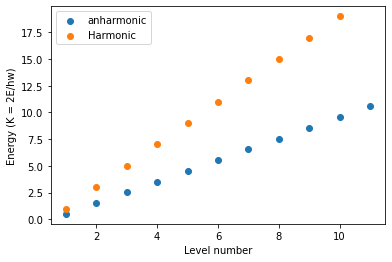

In [120]:
plt.figure()
plt.scatter(number,E_SM,label='anharmonic')
plt.xlabel("Level number")
plt.ylabel("Energy (K = 2E/hw)")

#EsHarmonic stored solutions from part a
numbA = range(1, 11)
partA = plt.scatter(numbA,EsHarmonic,label='Harmonic')
plt.legend();




For both cases, it can be seen that the energies are evenly spaced, and that the energies linearly increase with level number. 

---------------

## Question 1, part C)

Energy found: 0.50037
Energy found: 1.50187
Energy found: 2.50486
Energy found: 3.50933


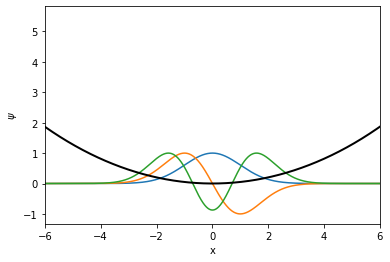

In [121]:
# PART C:
a = 1.0e-3
E1 =  0 # start Energy search at the well depth
dE = 1
npoints = 10000
E_SM = []

fig = plt.figure()
ax = fig.add_subplot(111)

# Bound states must have E < 0 for the square well. 
# Cut off after we have found a few states
while (E1 < 50-dE):

    if match(E1)*match(E1 + dE) < 0 :  # bracket E
        # find the energy
        E = rtf.bisect(match, E1, E1+dE, 1e-12)
        print('Energy found: %.5f'%(E))
        E_SM.append(E)
        if (len(E_SM)>3):
            break
        dx = 16*a/npoints
        
        # for plotting, must ensure overlap of left and right solutions 
        p_up = QM(E, npoints = npoints+4, x_start = -10, x_end = 0+4*dx)
        p_down = QM(E, npoints = npoints-4, x_start = 10, x_end = 0+4*dx)
        
        p_up.scipy_trajectory()
        p_down.scipy_trajectory()
        
        # scale factor
        scale = p_up.uv_end[0]/p_down.uv_end[0]
        
        # full solution, combine up and down solutions
        psi_x = np.concatenate((p_up.uv[:-1,0], scale*p_down.uv[::-1,0]))
        xa = np.linspace(-10,10, 2*npoints-1, endpoint = True)
        
        # plot the scaled solution (not normalized), scale maximum to 1 for plotting purposes
        ax.plot(xa, psi_x/max(psi_x))
    else : 
         print("No bracket, increasing energy to", E1+dE)
        
    E1 += dE


# plot the potential
ax.plot(xa, np.vectorize(p_up.Potential)(xa)/10., color = 'k', lw =2)
ax.set_xlim([-6, 6])
ax.set_xlabel('x')
ax.set_ylabel('$\psi$')
plt.show()